Introducing trees:

In [17]:
import matplotlib.pyplot as plt
import networkx as nx
from networkx.drawing.nx_pydot import graphviz_layout

In [18]:
def create_tree(m, h):
    """
    Return tree graph

    Args:
        m: number of children per node
        h: height of tree

    Returns:
        A networkx graph of a full m-ary tree with height h
    """
    fig, ax = plt.subplots(figsize=(25,8))
    network = nx.Graph() # Creating the graph and adding nodes
    T = nx.generators.balanced_tree(m, h)
    return T

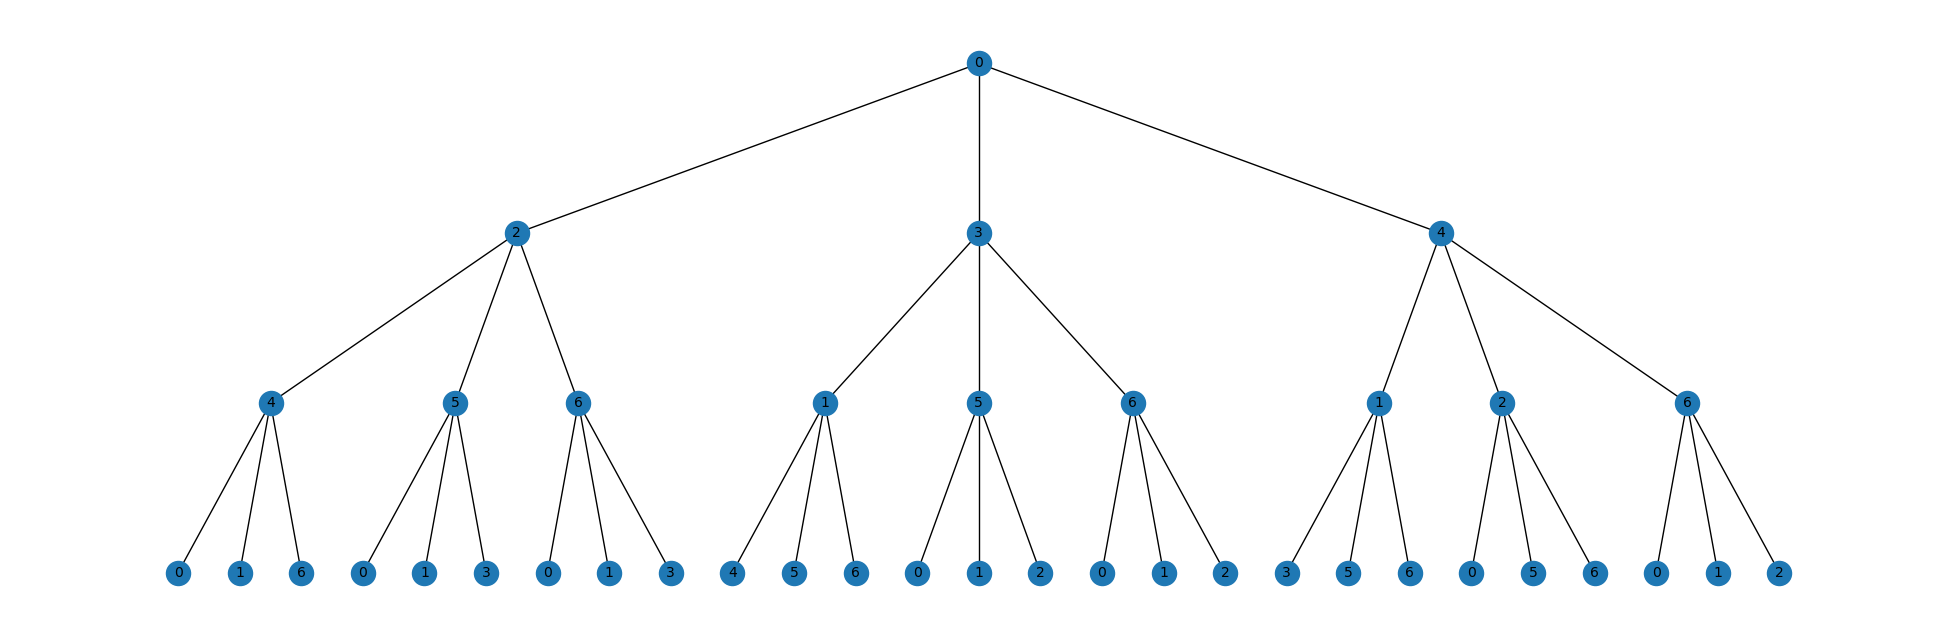

[0, 2, 3, 4, 4, 5, 6, 1, 5, 6, 1, 2, 6, 0, 1, 6, 0, 1, 3, 0, 1, 3, 4, 5, 6, 0, 1, 2, 0, 1, 2, 3, 5, 6, 0, 5, 6, 0, 1, 2]
No of unique labels are: 7
The span is: 6


In [20]:
tree = create_tree(3,3)
node_list = list(nx.nodes(tree))
label_list = dict.fromkeys(node_list)
for i in node_list:
    neighbors_list = list(nx.all_neighbors(tree, i))
    bad_list=[]
    for k in neighbors_list:
        if label_list[k] is not None:
            bad_list.append(label_list[k])
            bad_list.append(label_list[k]+1)
            bad_list.append(label_list[k]-1)
        secondary_neighbor = list(nx.all_neighbors(tree, k))
        for j in secondary_neighbor:
            if label_list[j] is not None:
                bad_list.append(label_list[j])
    if bad_list == []:
         label_list[i]=0
    else:
        possible_color=range(0,max(bad_list)+2)
        labels = [x for x in possible_color if x not in bad_list]
        label_list[i]=labels[0]

network = nx.Graph()
pos = graphviz_layout(tree, prog="dot")
nx.draw_networkx_labels(network, pos, label_list, font_size=10)
nx.draw_networkx(tree, pos, with_labels=False)
plt.axis("off")
plt.show()

color_list = list(label_list.values())
print(color_list)

unique_labels = []
count = 0

for item in color_list:
    if item not in unique_labels:
        count += 1
        unique_labels.append(item)
 
print("No of unique labels are:", count)
span=max(color_list)-min(color_list)
print("The span is:", span)
